## Análisis de Datos Meteorológicos con una API Pública
Obtener datos del clima de una ciudad usando la API de Open-Meteo (https://open-meteo.com/) y analizar la temperatura.

* Haz una petición a la API para que devuelva el pronóstico de las temperaturas para una semana en Bilbao. El parámetro correspondiente es `temperature_2m` además de la latitud y la longitud.
* Procesa la respuesta en formato JSON para obtener dos listas: una con la lista de temperaturas y otra con las fechas-horas correspondientes.
* Crea un DataFrame con esas dos columnas: `Hora` y `Temperatura`
* Elige la gráfica adecuada y visualiza el pronóstico de temperaturas.

Para crear la variable `Hora` del DataFrame puedes introducir directamente la lista que se obtiene del campo `data["hourly"]["time"]` o procesar esa lista mediante el siguiente código:

`hours = pd.date_range(start=lista_de_horas, periods=len(temps), freq="H")`

In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Coordenadas de Madrid
latitude = 40.4168
longitude = -3.7038


url = f"https://api.open-meteo.com/v1/forecast?latitude=43.2627&longitude=-2.9253&hourly=temperature_2m"  # Aquí vienen el resto de los parámetros
tiempo = requests.get(url)


In [53]:
pronostico = tiempo.json()

In [ ]:
tiempo_dict = {
    "Hora":pronostico["hourly"]["time"],
    "Temperatura":pronostico["hourly"]["temperature_2m"],
}
tiempo_dict


{'Hora': ['2025-03-27T00:00',
  '2025-03-27T01:00',
  '2025-03-27T02:00',
  '2025-03-27T03:00',
  '2025-03-27T04:00',
  '2025-03-27T05:00',
  '2025-03-27T06:00',
  '2025-03-27T07:00',
  '2025-03-27T08:00',
  '2025-03-27T09:00',
  '2025-03-27T10:00',
  '2025-03-27T11:00',
  '2025-03-27T12:00',
  '2025-03-27T13:00',
  '2025-03-27T14:00',
  '2025-03-27T15:00',
  '2025-03-27T16:00',
  '2025-03-27T17:00',
  '2025-03-27T18:00',
  '2025-03-27T19:00',
  '2025-03-27T20:00',
  '2025-03-27T21:00',
  '2025-03-27T22:00',
  '2025-03-27T23:00',
  '2025-03-28T00:00',
  '2025-03-28T01:00',
  '2025-03-28T02:00',
  '2025-03-28T03:00',
  '2025-03-28T04:00',
  '2025-03-28T05:00',
  '2025-03-28T06:00',
  '2025-03-28T07:00',
  '2025-03-28T08:00',
  '2025-03-28T09:00',
  '2025-03-28T10:00',
  '2025-03-28T11:00',
  '2025-03-28T12:00',
  '2025-03-28T13:00',
  '2025-03-28T14:00',
  '2025-03-28T15:00',
  '2025-03-28T16:00',
  '2025-03-28T17:00',
  '2025-03-28T18:00',
  '2025-03-28T19:00',
  '2025-03-28T20:00',
  

In [54]:
df_tiempo = pd.DataFrame(tiempo_dict)

In [55]:
df_tiempo

,Hora,Temperatura
0,2025-03-27T00:00,10.7
1,2025-03-27T01:00,10.8
2,2025-03-27T02:00,11.0
3,2025-03-27T03:00,10.6
4,2025-03-27T04:00,10.8
...,...,...
163,2025-04-02T19:00,18.3
164,2025-04-02T20:00,15.7
165,2025-04-02T21:00,13.7
166,2025-04-02T22:00,12.6


In [57]:
fechas = pd.to_datetime(df_tiempo["Hora"])

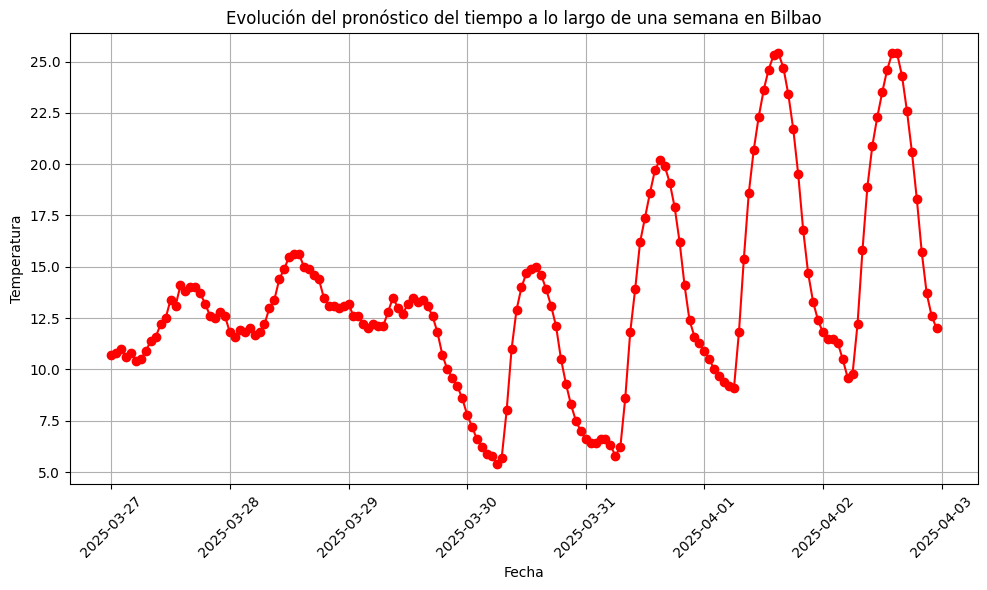

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fechas, df_tiempo["Temperatura"], color="red", marker="o")
plt.grid()
plt.title("Evolución del pronóstico del tiempo a lo largo de una semana en Bilbao")
plt.xlabel("Fecha")
plt.ylabel("Temperatura")
plt.xticks(rotation=45)
plt.tight_layout()